Simulate different synthetic periodic/aperiodic signals.
- Review time-plot, ACF and auto-covariance plots.
- Compute periodogram and review spectra.
- Repeat exercise with noisy synthetic signals.



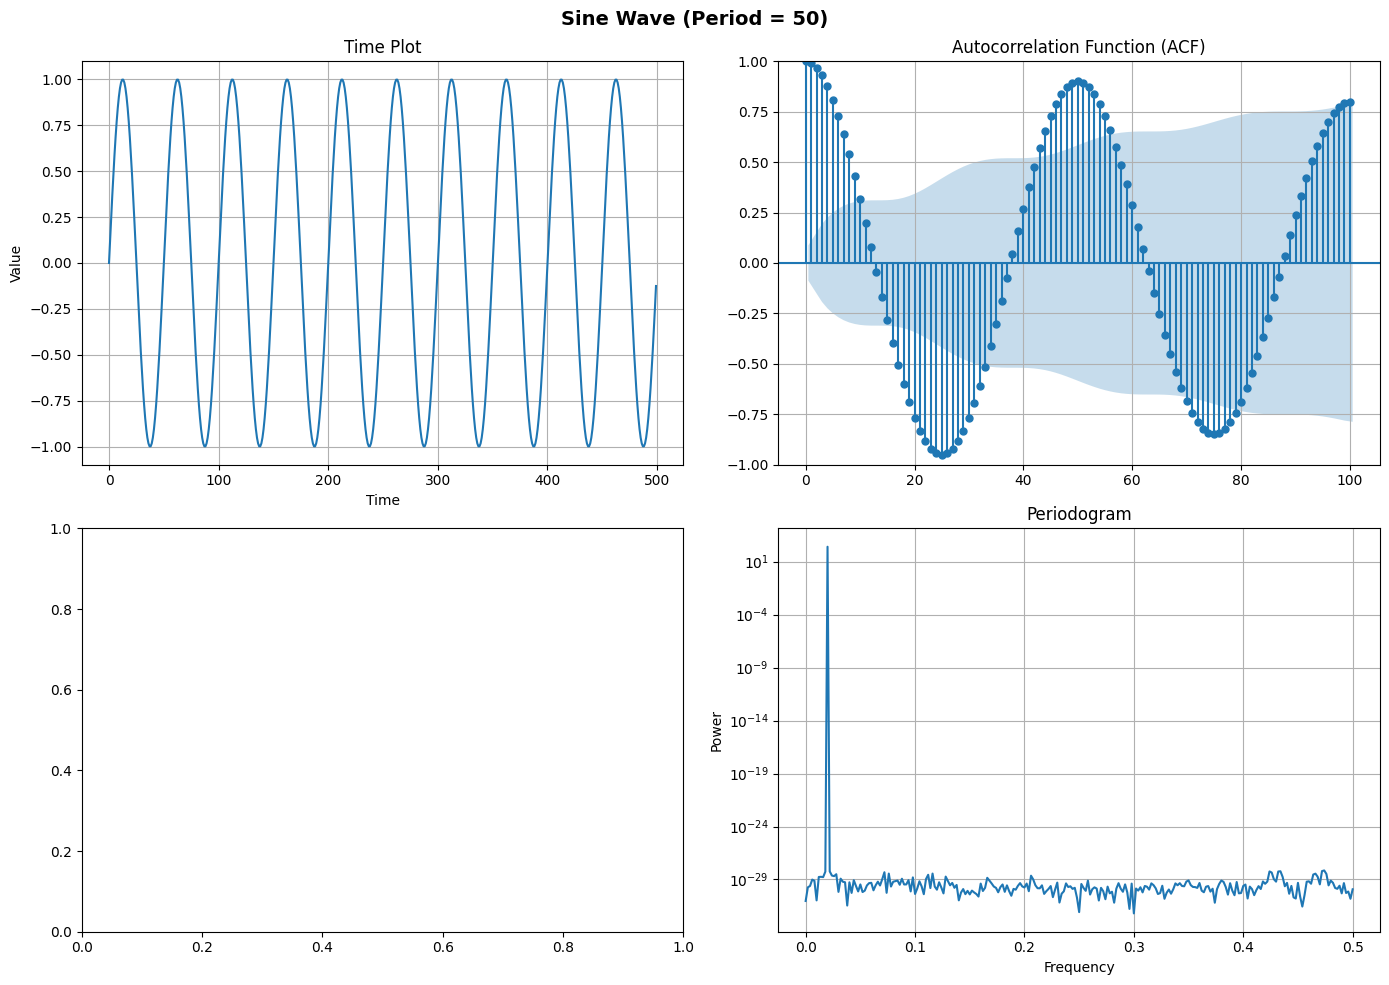

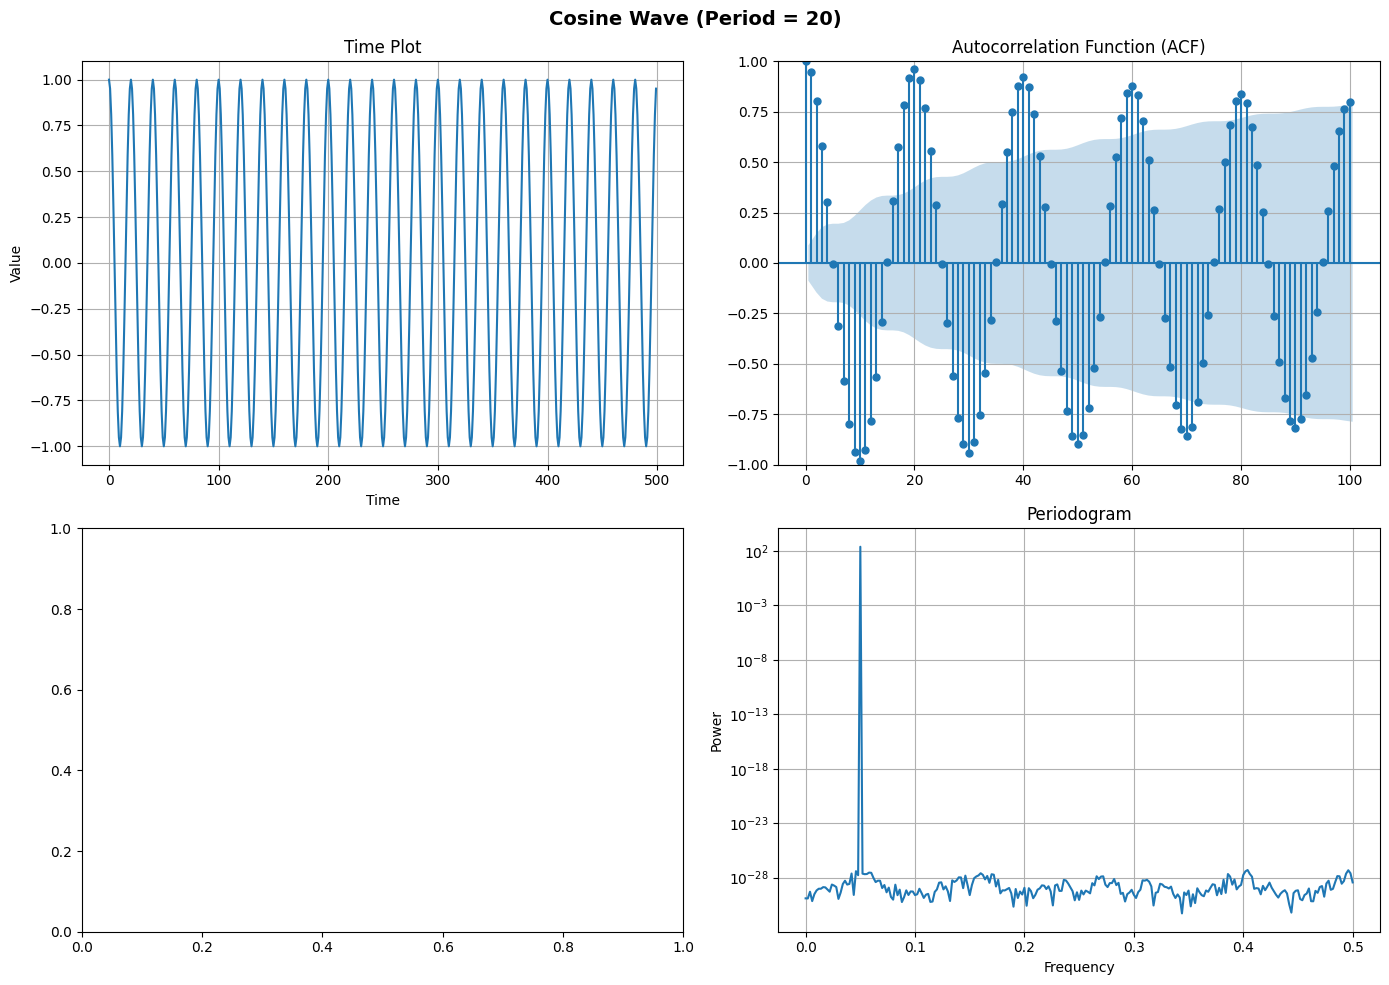

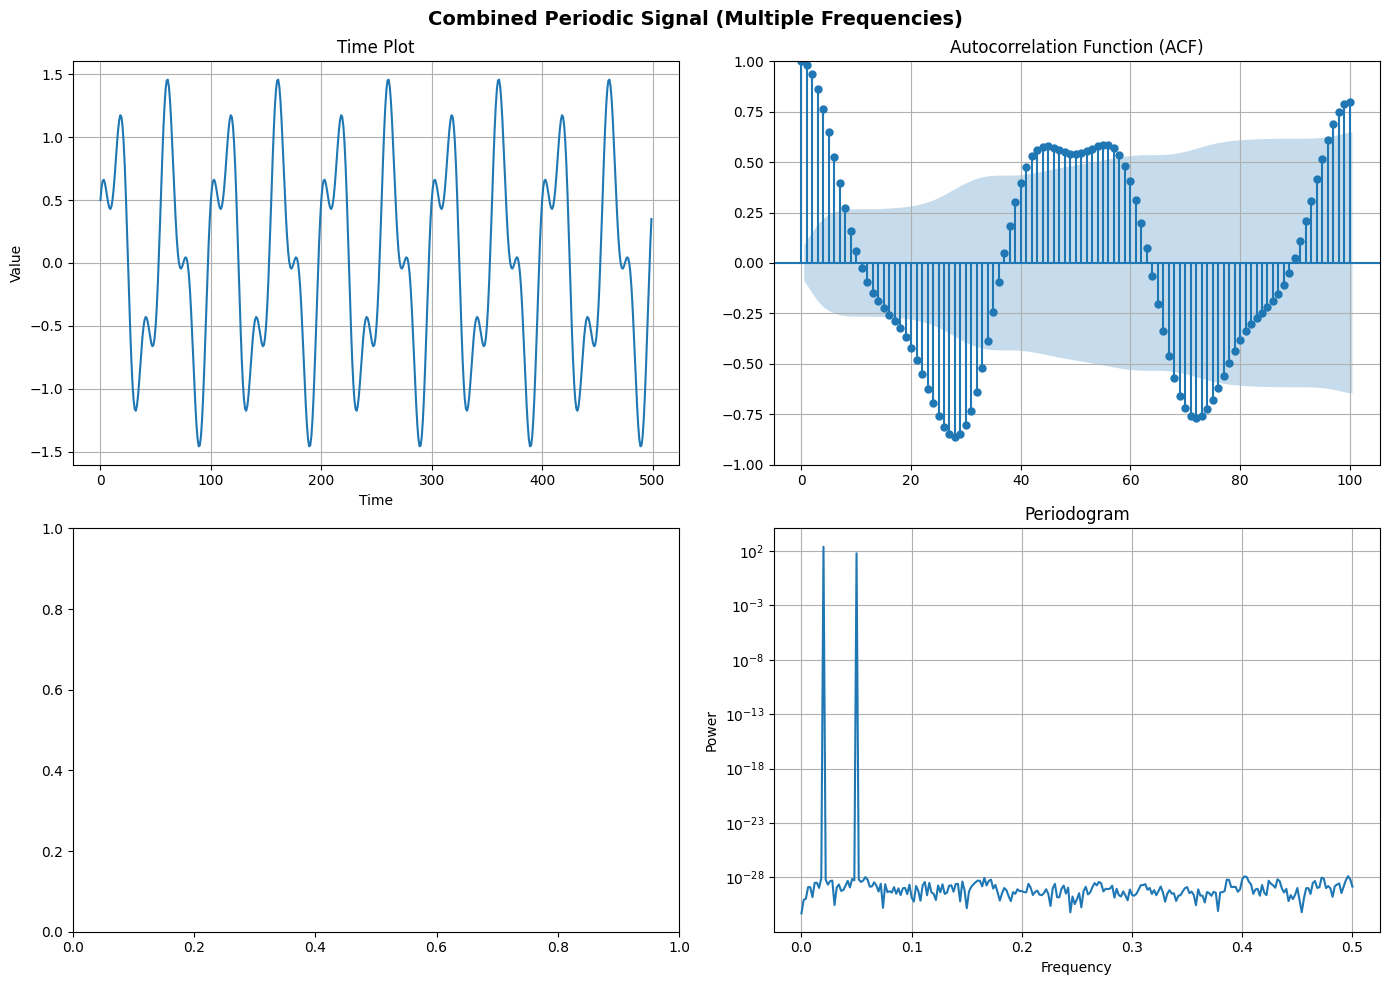

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy import signal

np.random.seed(42)

n = 500  # Number of samples
t = np.arange(n)

# 1. Periodic Signals
# Ssine wave
period1 = 50
sine_wave = np.sin(2 * np.pi * t / period1)
# cosine wave
period2 = 20
cosine_wave = np.cos(2 * np.pi * t / period2)
# Combined periodic signal (multiple frequencies)
combined_periodic = sine_wave + 0.5 * cosine_wave

# 2. Aperiodic Signals
white_noise = np.random.normal(0, 1, n)
# AR(1) process: y_t = 0.8 * y_{t-1} + e_t
ar1 = np.zeros(n)
phi = 0.8
for i in range(1, n):
    ar1[i] = phi * ar1[i-1] + np.random.normal(0, 1)
# Random walk: y_t = y_{t-1} + e_t
random_walk = np.cumsum(np.random.normal(0, 1, n))

def analyze_signal(signal_data, title, max_lag=100):
    """Create comprehensive analysis plots for a signal."""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(title, fontsize=14, fontweight='bold')
    
    # Time plot
    axes[0, 0].plot(signal_data)
    axes[0, 0].set_title('Time Plot')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Value')
    axes[0, 0].grid(True)
    
    # ACF plot
    plot_acf(signal_data, lags=max_lag, ax=axes[0, 1], title='Autocorrelation Function (ACF)')
    axes[0, 1].grid(True)
    
    # Periodogram (spectral analysis)
    freqs, psd = signal.periodogram(signal_data)
    axes[1, 1].semilogy(freqs, psd)
    axes[1, 1].set_title('Periodogram')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].set_ylabel('Power')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

analyze_signal(sine_wave, 'Sine Wave (Period = 50)')
analyze_signal(cosine_wave, 'Cosine Wave (Period = 20)')
analyze_signal(combined_periodic, 'Combined Periodic Signal (Multiple Frequencies)')

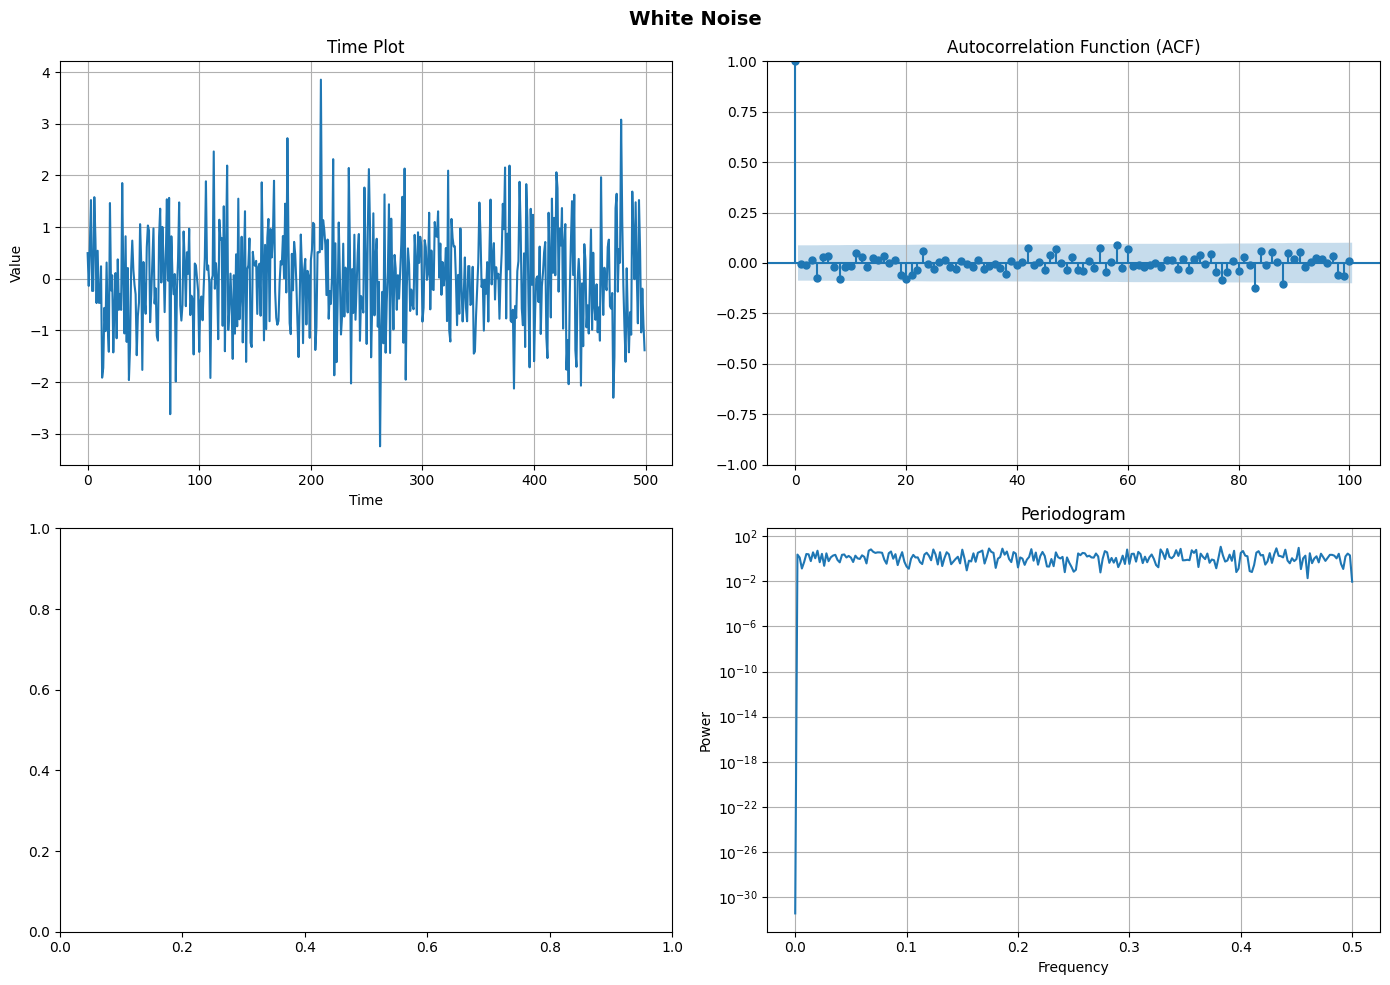

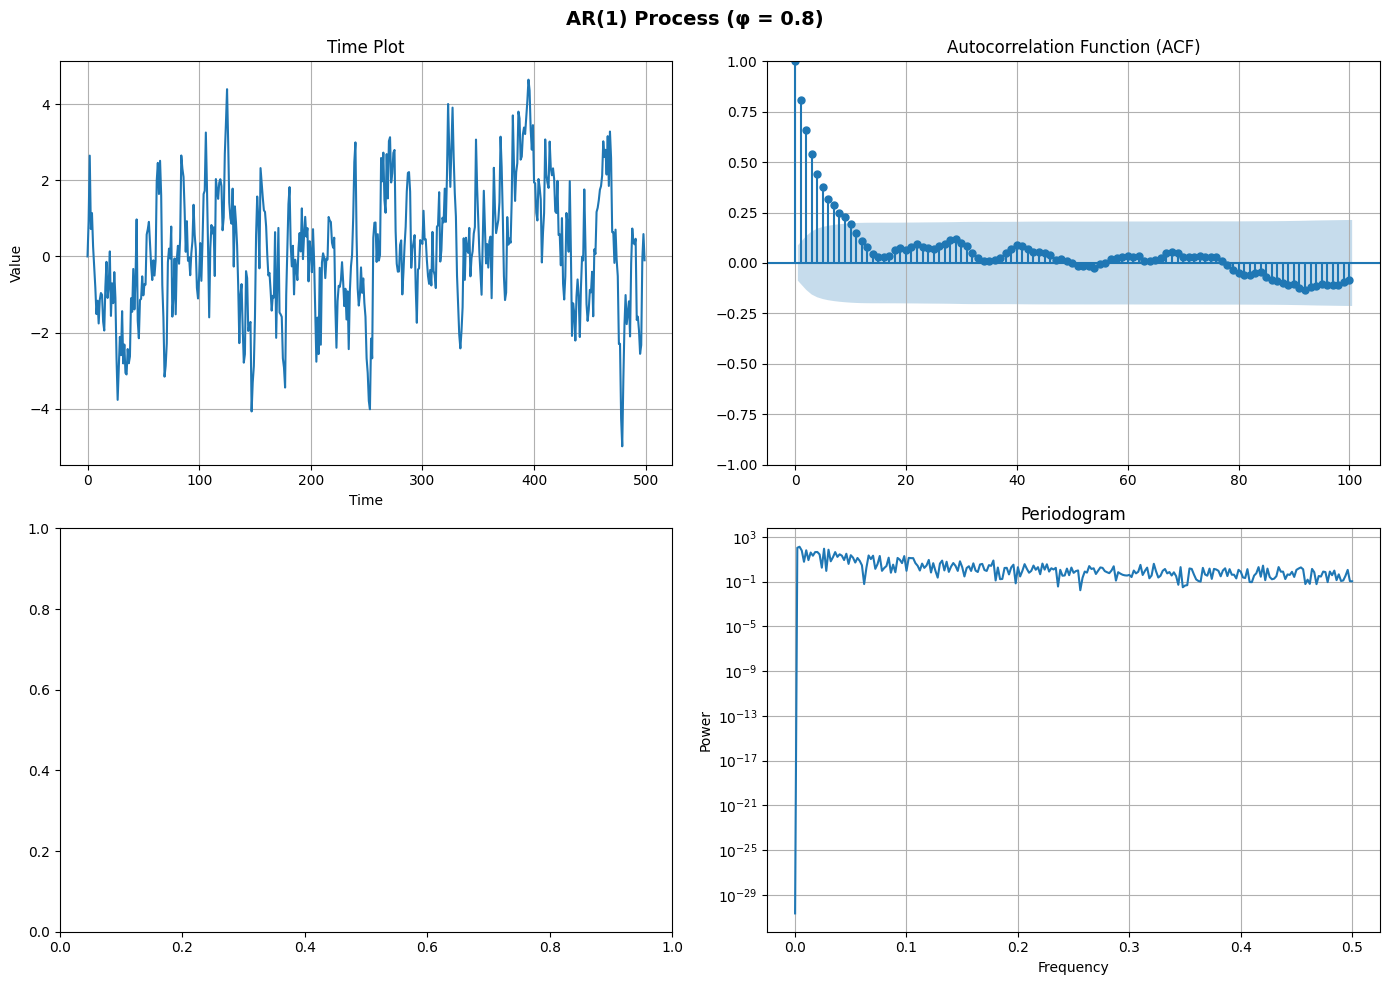

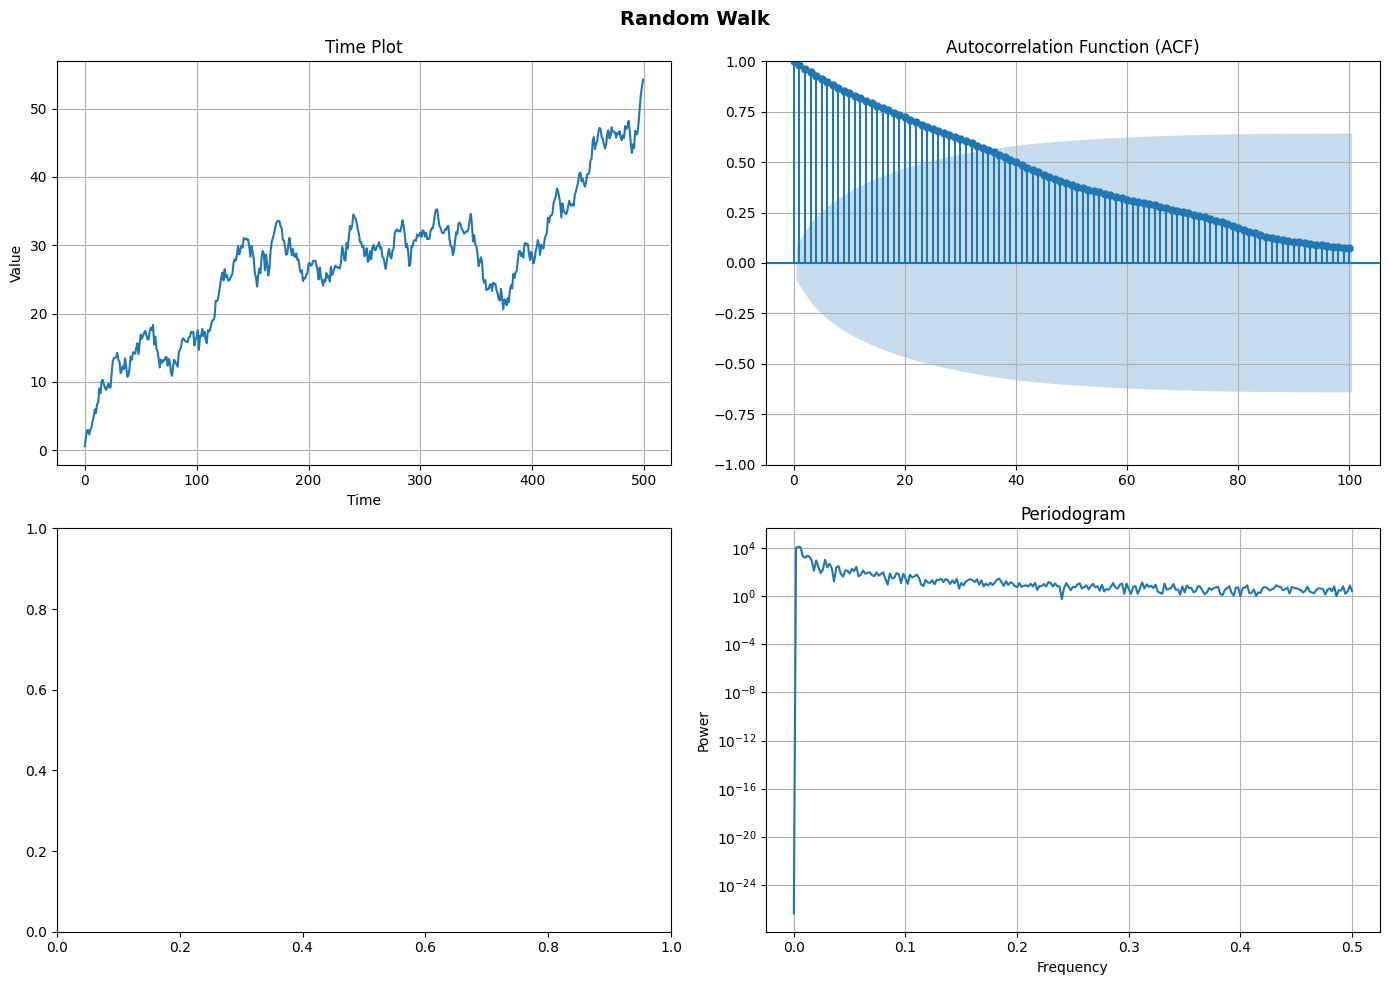

In [5]:
# Analyze Aperiodic Signals
analyze_signal(white_noise, 'White Noise')
analyze_signal(ar1, 'AR(1) Process (φ = 0.8)')
analyze_signal(random_walk, 'Random Walk')

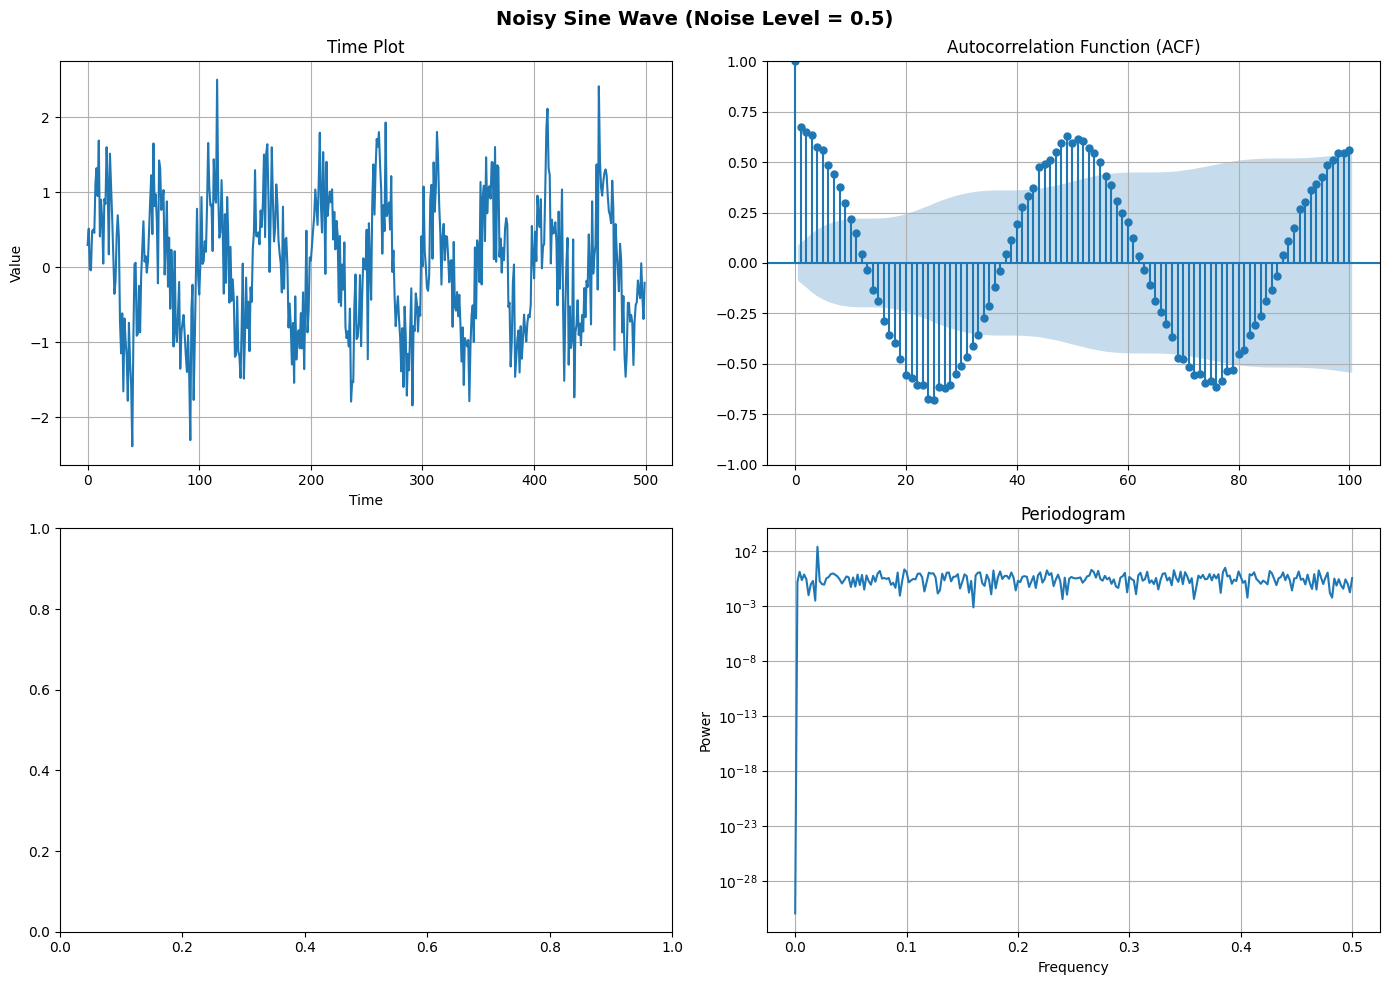

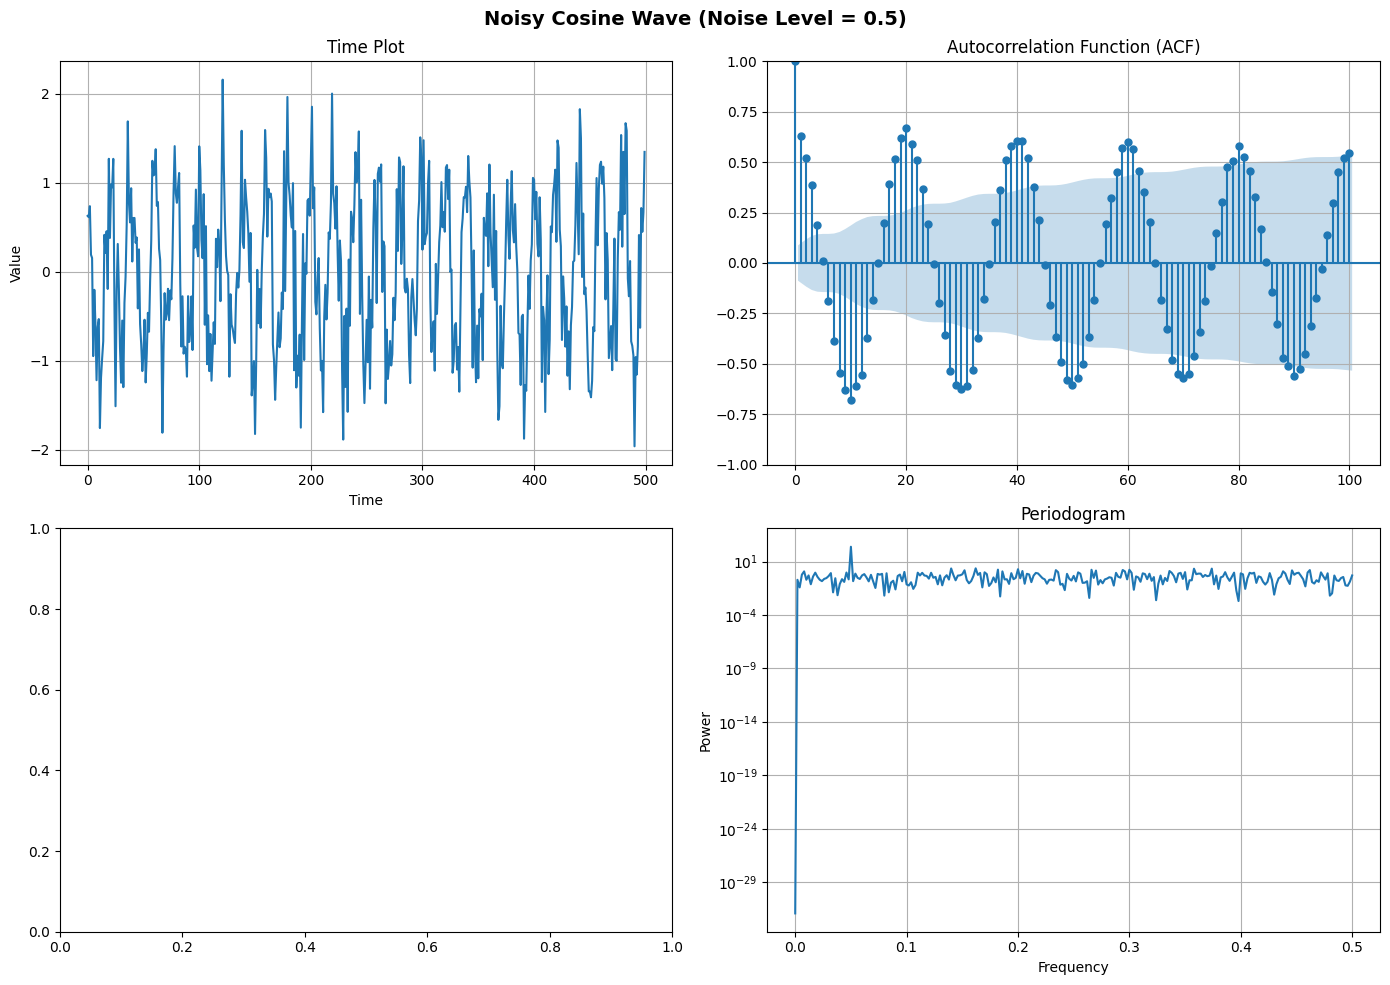

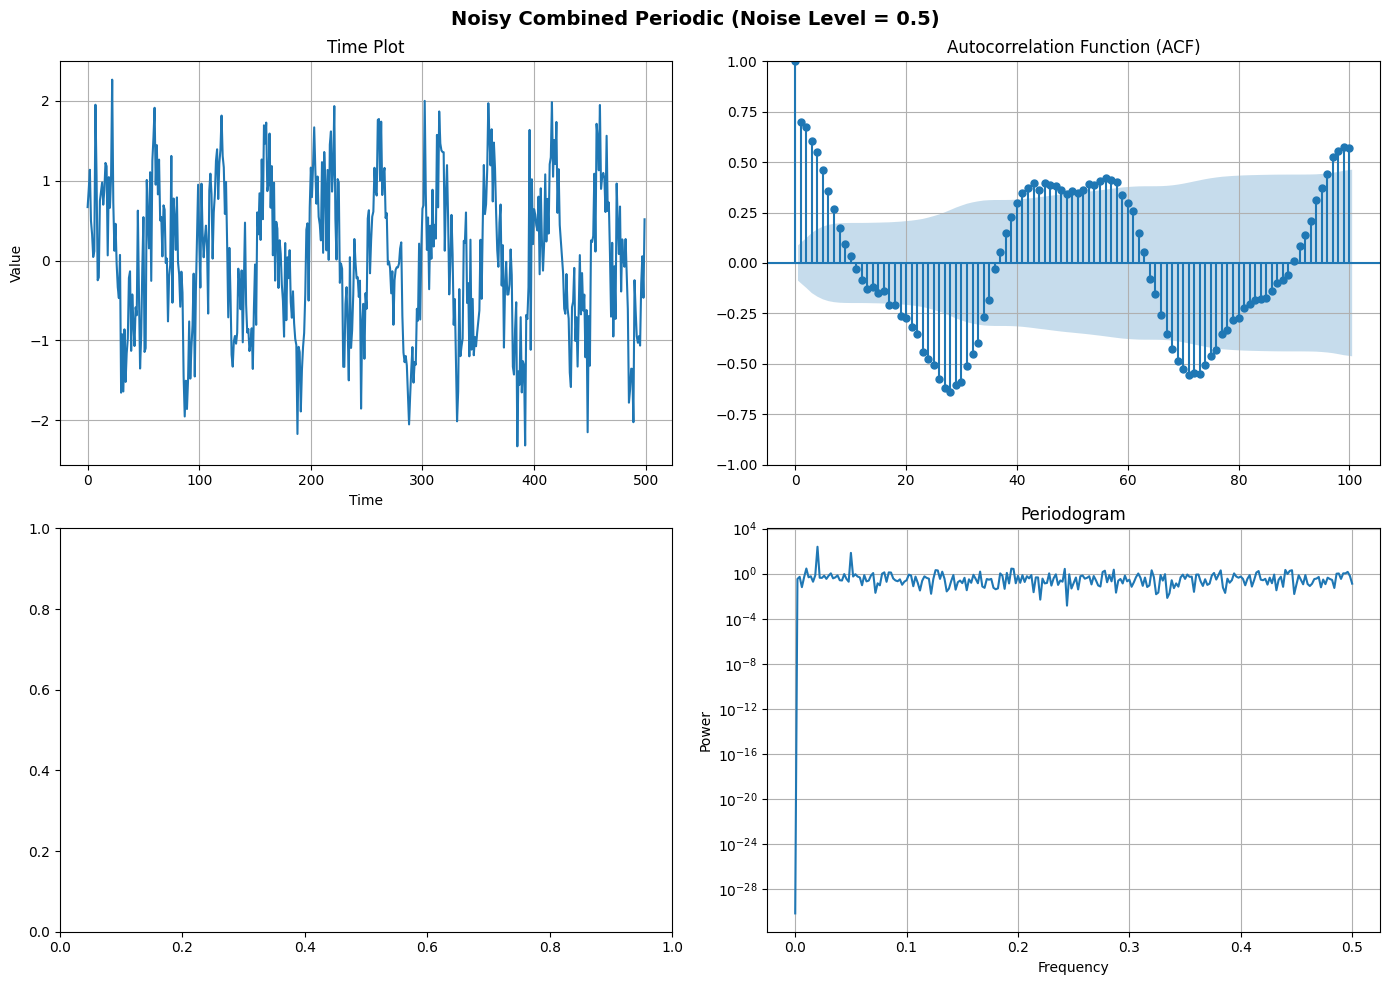

In [6]:
# Add noise to periodic signals
noise_level = 0.5
sine_noisy = sine_wave + noise_level * np.random.normal(0, 1, n)
cosine_noisy = cosine_wave + noise_level * np.random.normal(0, 1, n)
combined_noisy = combined_periodic + noise_level * np.random.normal(0, 1, n)

analyze_signal(sine_noisy, f'Noisy Sine Wave (Noise Level = {noise_level})')
analyze_signal(cosine_noisy, f'Noisy Cosine Wave (Noise Level = {noise_level})')
analyze_signal(combined_noisy, f'Noisy Combined Periodic (Noise Level = {noise_level})')

# Observations:
## Periodic Signals
- **Time Plot**: Clear repetitive patterns with constant amplitude
- **ACF**: Oscillates with the same period as the signal, doesn't decay
- **Periodogram**: Sharp peaks at the fundamental frequency and harmonics

## Aperiodic Signals
- **White Noise**: ACF drops immediately to zero after lag 0, flat periodogram (all frequencies equally represented)
- **AR(1)**: Exponentially decaying ACF, smooth spectral peak at low frequencies
- **Random Walk**: Very slow ACF decay indicating non-stationarity, power concentrated at low frequencies

## Effect of Adding Noise
- Periodic patterns become less clear in the time plot
- ACF oscillations are dampened but fundamental period remains visible
- Periodogram shows the same peaks but with a raised noise floor
- The signal-to-noise ratio determines how visible the periodic component is

Analyze the spectral density of known processes.
- Review how parameters affect the spectral density.
- Integrate the spectral density to confirm it matches the total variance.
- Generate signals and compare periodogram with spectral density.



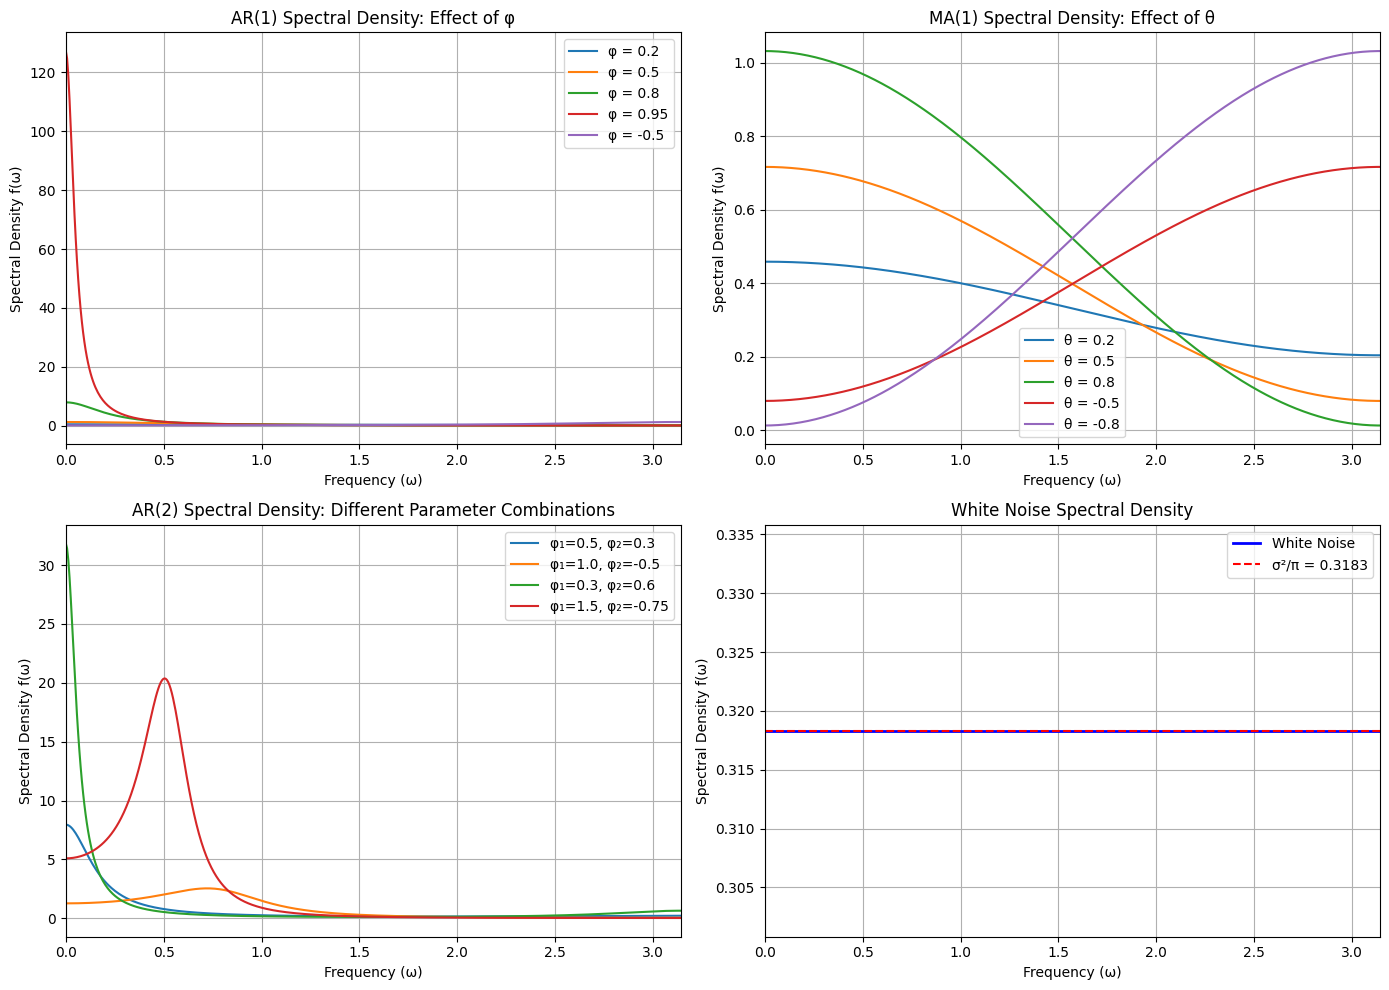

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import trapezoid

# Frequency range for theoretical spectral density
omega = np.linspace(0.001, np.pi, 500)

# 1. White Noise
sigma2_wn = 1.0
spectral_wn = np.full_like(omega, sigma2_wn / np.pi)

def ar1_spectral_density(omega, phi, sigma2=1.0):
    """Theoretical spectral density for AR(1) process."""
    return sigma2 / (np.pi * (1 - 2 * phi * np.cos(omega) + phi**2))
# Different AR(1) parameters
phi_values = [0.2, 0.5, 0.8, 0.95, -0.5]

def ma1_spectral_density(omega, theta, sigma2=1.0):
    """Theoretical spectral density for MA(1) process."""
    return sigma2 * (1 + 2 * theta * np.cos(omega) + theta**2) / np.pi
# Different MA(1) parameters
theta_values = [0.2, 0.5, 0.8, -0.5, -0.8]

def ar2_spectral_density(omega, phi1, phi2, sigma2=1.0):
    """Theoretical spectral density for AR(2) process."""
    z = np.exp(-1j * omega)
    denom = np.abs(1 - phi1 * z - phi2 * z**2)**2
    return sigma2 / (np.pi * denom)
ar2_params = [(0.5, 0.3), (1.0, -0.5), (0.3, 0.6), (1.5, -0.75)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# AR(1) with different phi values
ax = axes[0, 0]
for phi in phi_values:
    spec = ar1_spectral_density(omega, phi)
    ax.plot(omega, spec, label=f'φ = {phi}')
ax.set_title('AR(1) Spectral Density: Effect of φ')
ax.set_xlabel('Frequency (ω)')
ax.set_ylabel('Spectral Density f(ω)')
ax.legend()
ax.grid(True)
ax.set_xlim([0, np.pi])

# MA(1) with different theta values
ax = axes[0, 1]
for theta in theta_values:
    spec = ma1_spectral_density(omega, theta)
    ax.plot(omega, spec, label=f'θ = {theta}')
ax.set_title('MA(1) Spectral Density: Effect of θ')
ax.set_xlabel('Frequency (ω)')
ax.set_ylabel('Spectral Density f(ω)')
ax.legend()
ax.grid(True)
ax.set_xlim([0, np.pi])

# AR(2) with different parameters 
ax = axes[1, 0]
for phi1, phi2 in ar2_params:
    spec = ar2_spectral_density(omega, phi1, phi2)
    ax.plot(omega, spec, label=f'φ₁={phi1}, φ₂={phi2}')
ax.set_title('AR(2) Spectral Density: Different Parameter Combinations')
ax.set_xlabel('Frequency (ω)')
ax.set_ylabel('Spectral Density f(ω)')
ax.legend()
ax.grid(True)
ax.set_xlim([0, np.pi])

# White noise
ax = axes[1, 1]
ax.plot(omega, spectral_wn, 'b-', linewidth=2, label='White Noise')
ax.axhline(y=sigma2_wn/np.pi, color='r', linestyle='--', label=f'σ²/π = {sigma2_wn/np.pi:.4f}')
ax.set_title('White Noise Spectral Density')
ax.set_xlabel('Frequency (ω)')
ax.set_ylabel('Spectral Density f(ω)')
ax.legend()
ax.grid(True)
ax.set_xlim([0, np.pi])

plt.tight_layout()
plt.show()

# Observations
Phi affects the density in AR(1) processes, where a large positive phi has high density at low frequencies.
Effects of negative phi is not visible on the spectral density plot.

Theta affects the density in MA(1) processes, where a large positive theta has high density at low frequencies.
Meanwhile a large negative theta has a larger density at high frequencies.

For AR(2) processes the spectral density shows some peaks at intermediate frequencies when phi_1 is positive and phi_2 is negative.

White noise has a flat spectral density across all frequencies.

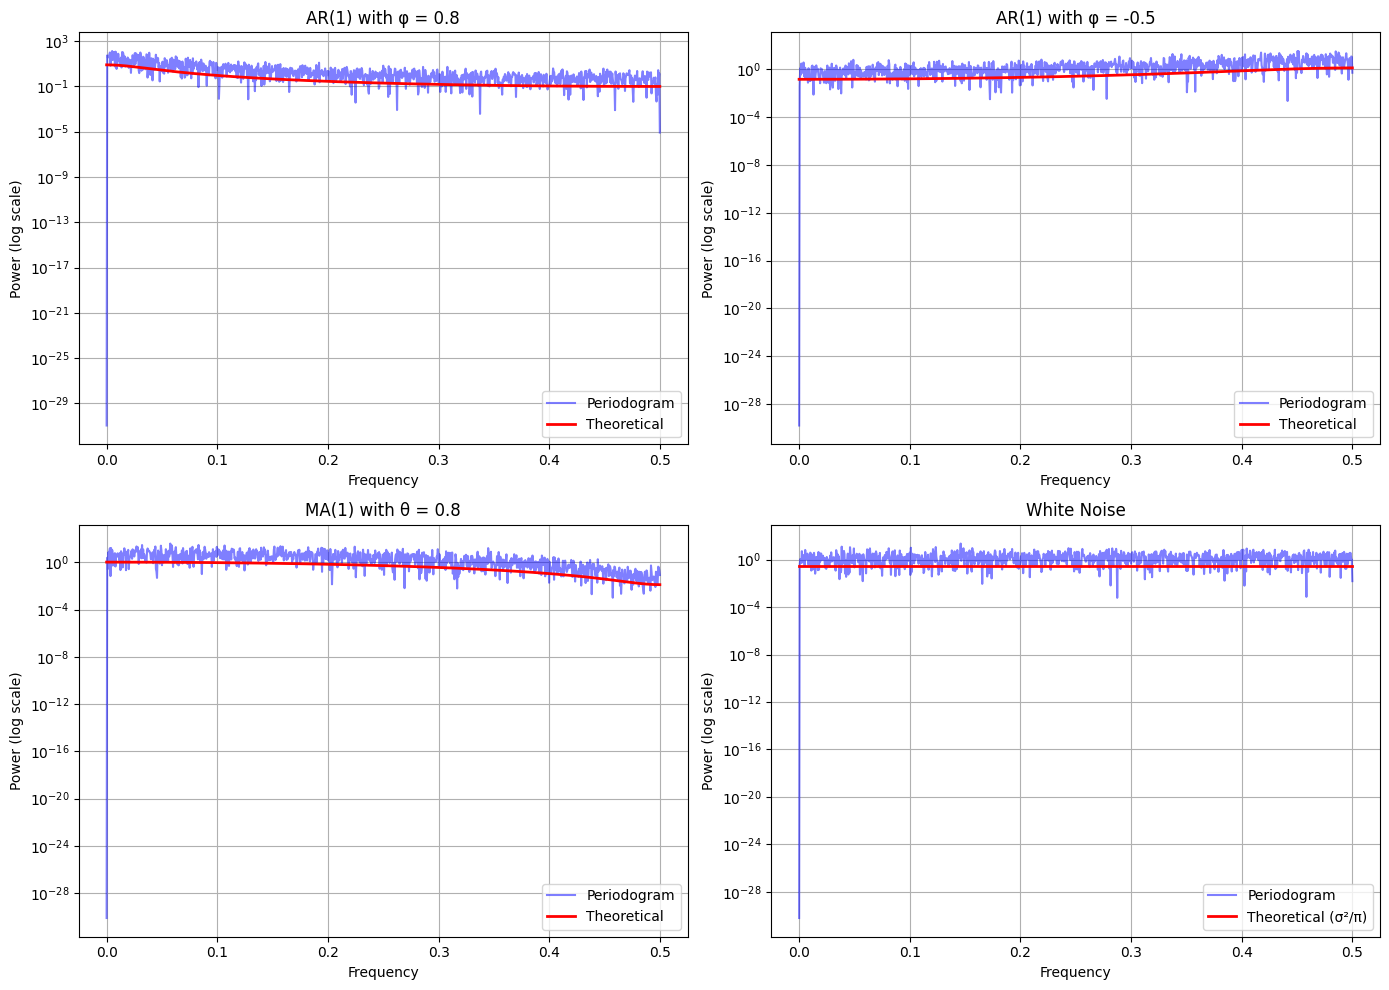

In [8]:
# Compare Periodogram with Theoretical Spectral Density
n = 2000 

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. AR(1) with φ = 0.8
phi = 0.8
ar1_series = np.zeros(n)
for i in range(1, n):
    ar1_series[i] = phi * ar1_series[i-1] + np.random.normal(0, 1)

# Compute periodogram
freqs_ar1, psd_ar1 = signal.periodogram(ar1_series, fs=1.0)
# Theoretical spectral density (convert frequency to angular frequency)
omega_ar1 = 2 * np.pi * freqs_ar1
theoretical_ar1 = ar1_spectral_density(omega_ar1, phi)

ax = axes[0, 0]
ax.semilogy(freqs_ar1, psd_ar1, 'b-', alpha=0.5, label='Periodogram')
ax.semilogy(freqs_ar1, theoretical_ar1, 'r-', linewidth=2, label='Theoretical')
ax.set_title(f'AR(1) with φ = {phi}')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power (log scale)')
ax.legend()
ax.grid(True)

# 2. AR(1) with φ = -0.5
phi = -0.5
ar1_neg = np.zeros(n)
for i in range(1, n):
    ar1_neg[i] = phi * ar1_neg[i-1] + np.random.normal(0, 1)

freqs_ar1_neg, psd_ar1_neg = signal.periodogram(ar1_neg, fs=1.0)
omega_ar1_neg = 2 * np.pi * freqs_ar1_neg
theoretical_ar1_neg = ar1_spectral_density(omega_ar1_neg, phi)

ax = axes[0, 1]
ax.semilogy(freqs_ar1_neg, psd_ar1_neg, 'b-', alpha=0.5, label='Periodogram')
ax.semilogy(freqs_ar1_neg, theoretical_ar1_neg, 'r-', linewidth=2, label='Theoretical')
ax.set_title(f'AR(1) with φ = {phi}')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power (log scale)')
ax.legend()
ax.grid(True)

# 3. MA(1) with θ = 0.8
theta = 0.8
e = np.random.normal(0, 1, n)
ma1_series = e[1:] + theta * e[:-1]

freqs_ma1, psd_ma1 = signal.periodogram(ma1_series, fs=1.0)
omega_ma1 = 2 * np.pi * freqs_ma1
theoretical_ma1 = ma1_spectral_density(omega_ma1, theta)

ax = axes[1, 0]
ax.semilogy(freqs_ma1, psd_ma1, 'b-', alpha=0.5, label='Periodogram')
ax.semilogy(freqs_ma1, theoretical_ma1, 'r-', linewidth=2, label='Theoretical')
ax.set_title(f'MA(1) with θ = {theta}')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power (log scale)')
ax.legend()
ax.grid(True)

# 4. White Noise
wn = np.random.normal(0, 1, n)
freqs_wn, psd_wn = signal.periodogram(wn, fs=1.0)
theoretical_wn = np.full_like(freqs_wn, 1.0 / np.pi)

ax = axes[1, 1]
ax.semilogy(freqs_wn, psd_wn, 'b-', alpha=0.5, label='Periodogram')
ax.semilogy(freqs_wn, theoretical_wn, 'r-', linewidth=2, label='Theoretical (σ²/π)')
ax.set_title('White Noise')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power (log scale)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# Observation
- Periodogram is a noisy estimate of the true spectral density
- General shape of periodogram matches theoretical spectral density

Study real-world time series.
- Compute periodogram and review spectra

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.graphics.tsaplots import plot_acf
from scipy.signal import find_peaks

df = pd.read_parquet("basel-energy-demand.parquet")
df.head()

,timestamp_interval_start,timestamp_interval_start_text,stromverbrauch_kwh,grundversorgte_kunden_kwh,freie_kunden_kwh,year,month,day,weekday,dayofyear,quarter,weekofyear
0,2025-09-30 21:45:00+00:00,2025-09-30T23:45:00+0200,27318.806,12528.324,14790.482,2025,9,30,1,273,3,40
1,2025-09-30 21:30:00+00:00,2025-09-30T23:30:00+0200,27922.965,13122.010,14800.955,2025,9,30,1,273,3,40
2,2025-09-30 21:15:00+00:00,2025-09-30T23:15:00+0200,28249.646,13400.783,14848.863,2025,9,30,1,273,3,40
3,2025-09-30 21:00:00+00:00,2025-09-30T23:00:00+0200,29038.658,14031.674,15006.984,2025,9,30,1,273,3,40
4,2025-09-30 20:45:00+00:00,2025-09-30T22:45:00+0200,30034.410,14801.535,15232.875,2025,9,30,1,273,3,40


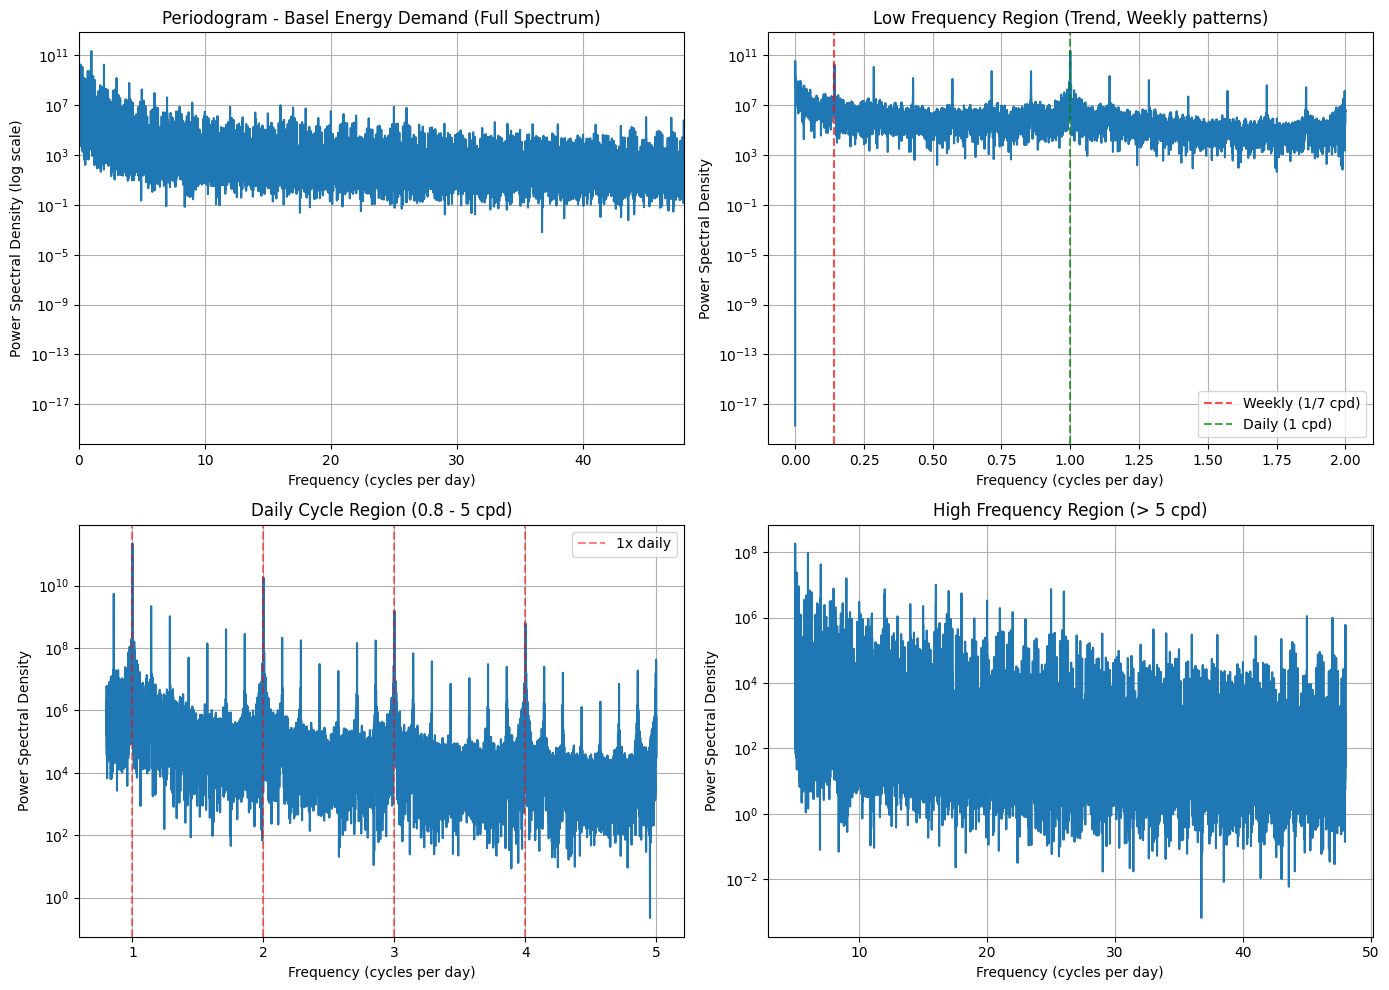


Top 10 Spectral Peaks:
1. Frequency: 1.0001 cpd | Period: 24.00 hours | Power: 2.22e+11
2. Frequency: 0.0002 cpd | Period: 5021.41 days | Power: 3.51e+10
3. Frequency: 0.1428 cpd | Period: 7.00 days | Power: 1.82e+10
4. Frequency: 2.0002 cpd | Period: 12.00 hours | Power: 1.81e+10
5. Frequency: 0.2858 cpd | Period: 3.50 days | Power: 1.18e+10
6. Frequency: 0.7143 cpd | Period: 1.40 days | Power: 5.57e+09
7. Frequency: 0.8573 cpd | Period: 1.17 days | Power: 5.46e+09
8. Frequency: 1.1429 cpd | Period: 21.00 hours | Power: 2.18e+09
9. Frequency: 0.4286 cpd | Period: 2.33 days | Power: 1.53e+09
10. Frequency: 3.0004 cpd | Period: 8.00 hours | Power: 1.52e+09


In [10]:
# Periodogram Analysis of Basel Energy Demand

energy = df['stromverbrauch_kwh'].values

# Sampling frequency: 96 samples per day (15-minute intervals)
fs = 96

# Compute periodogram
freqs, psd = signal.periodogram(energy, fs=fs)

# Plot the full periodogram
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Full periodogram (log scale)
ax = axes[0, 0]
ax.semilogy(freqs, psd)
ax.set_title('Periodogram - Basel Energy Demand (Full Spectrum)')
ax.set_xlabel('Frequency (cycles per day)')
ax.set_ylabel('Power Spectral Density (log scale)')
ax.grid(True)
ax.set_xlim([0, fs/2])

# 2. Low frequency region (trend and long-term patterns)
ax = axes[0, 1]
low_freq_mask = freqs < 2  # Less than 2 cycles per day
ax.semilogy(freqs[low_freq_mask], psd[low_freq_mask])
ax.set_title('Low Frequency Region (Trend, Weekly patterns)')
ax.set_xlabel('Frequency (cycles per day)')
ax.set_ylabel('Power Spectral Density')
ax.grid(True)
# Mark important frequencies
ax.axvline(x=1/7, color='r', linestyle='--', alpha=0.7, label='Weekly (1/7 cpd)')
ax.axvline(x=1, color='g', linestyle='--', alpha=0.7, label='Daily (1 cpd)')
ax.legend()

# 3. Daily cycle region
ax = axes[1, 0]
daily_mask = (freqs >= 0.8) & (freqs <= 5)
ax.semilogy(freqs[daily_mask], psd[daily_mask])
ax.set_title('Daily Cycle Region (0.8 - 5 cpd)')
ax.set_xlabel('Frequency (cycles per day)')
ax.set_ylabel('Power Spectral Density')
ax.grid(True)
# Mark harmonics of daily cycle
for h in range(1, 5):
    ax.axvline(x=h, color='r', linestyle='--', alpha=0.5, label=f'{h}x daily' if h==1 else '')
ax.legend()

# 4. High frequency region (sub-daily patterns)
ax = axes[1, 1]
high_freq_mask = freqs > 5
ax.semilogy(freqs[high_freq_mask], psd[high_freq_mask])
ax.set_title('High Frequency Region (> 5 cpd)')
ax.set_xlabel('Frequency (cycles per day)')
ax.set_ylabel('Power Spectral Density')
ax.grid(True)

plt.tight_layout()
plt.show()

# Find peaks in the periodogram
peaks, properties = find_peaks(psd, height=np.percentile(psd, 99))
peak_freqs = freqs[peaks]
peak_powers = psd[peaks]

# Sort by power and show top 10
sorted_idx = np.argsort(peak_powers)[::-1][:10]
print("\nTop 10 Spectral Peaks:")
for i, idx in enumerate(sorted_idx):
    freq = peak_freqs[idx]
    power = peak_powers[idx]
    period_days = 1/freq if freq > 0 else np.inf
    if period_days >= 1:
        period_str = f"{period_days:.2f} days"
    else:
        period_hours = period_days * 24
        period_str = f"{period_hours:.2f} hours"
    print(f"{i+1}. Frequency: {freq:.4f} cpd | Period: {period_str} | Power: {power:.2e}")

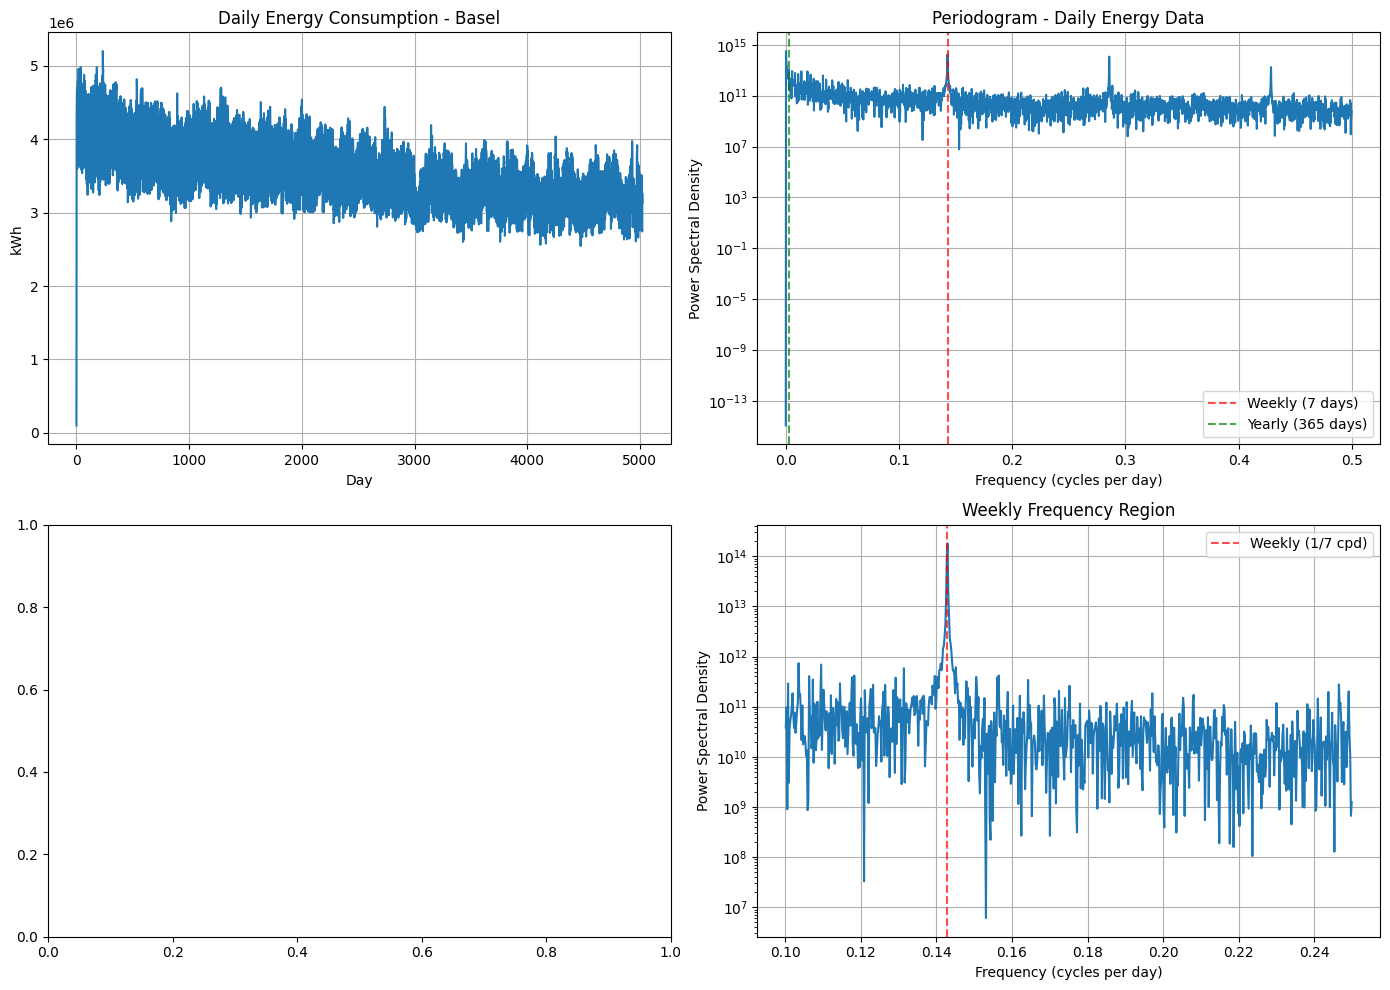

In [12]:
# Aggregate to daily to see weekly and seasonal patterns more clearly
df['date'] = pd.to_datetime(df['timestamp_interval_start']).dt.date
daily_energy = df.groupby('date')['stromverbrauch_kwh'].sum().values

# Daily sampling frequency = 1 sample per day
fs_daily = 1

# Compute periodogram for daily data
freqs_daily, psd_daily = signal.periodogram(daily_energy, fs=fs_daily)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Time plot of daily energy
ax = axes[0, 0]
ax.plot(daily_energy)
ax.set_title('Daily Energy Consumption - Basel')
ax.set_xlabel('Day')
ax.set_ylabel('kWh')
ax.grid(True)

# 2. Full periodogram (daily data)
ax = axes[0, 1]
ax.semilogy(freqs_daily, psd_daily)
ax.set_title('Periodogram - Daily Energy Data')
ax.set_xlabel('Frequency (cycles per day)')
ax.set_ylabel('Power Spectral Density')
ax.grid(True)
# Mark key frequencies
ax.axvline(x=1/7, color='r', linestyle='--', alpha=0.7, label='Weekly (7 days)')
ax.axvline(x=1/365, color='g', linestyle='--', alpha=0.7, label='Yearly (365 days)')
ax.legend()

# 3. Weekly pattern detail
ax = axes[1, 1]
weekly_mask = (freqs_daily >= 0.1) & (freqs_daily <= 0.25)
ax.semilogy(freqs_daily[weekly_mask], psd_daily[weekly_mask])
ax.set_title('Weekly Frequency Region')
ax.set_xlabel('Frequency (cycles per day)')
ax.set_ylabel('Power Spectral Density')
ax.grid(True)
ax.axvline(x=1/7, color='r', linestyle='--', alpha=0.7, label='Weekly (1/7 cpd)')
ax.legend()

plt.tight_layout()
plt.show()

# Conclusions: Basel Energy Demand Spectral Analysis

## Dominant Frequency Components

| Rank | Frequency (cpd) | Period | Power | Physical Interpretation |
|------|-----------------|--------|-------|------------------------|
| 1 | 1.0001 | **24 hours** | 2.22×10¹¹ | Daily cycle (day/night usage) |
| 2 | ~0.0002 | ~5000 days | 3.51×10¹⁰ | Long-term trend |
| 3 | 0.1428 | **7 days** | 1.82×10¹⁰ | Weekly cycle (weekday/weekend) |

### 1. Daily Cycle Dominance
- The **24-hour cycle** is the strongest periodic component
- Reflects morning ramp-up, daytime peak, evening decline, and night trough

### 2. Weekly Pattern
- Strong peak at **1/7 cycles per day** (7-day period)
- Weekdays have higher consumption than weekends

### 3. Long-term Trend
- High power at very low frequencies indicates **non-stationarity**
- Visible downward trend in daily data (solar panel adoption, efficiency gains)
